# Weather analysis

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys_DL import weather_api_key

In [79]:
#pip install citipy

In [80]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [81]:
dir(citipy)

['City',
 'WORLD_CITIES_DICT',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_current_dir',
 '_current_filename',
 '_world_cities_csv_path',
 '_world_cities_kdtree',
 'c',
 'cities',
 'city',
 'city_coordinate_key',
 'csv',
 'csv_file',
 'kdtree',
 'nearest_city',
 'os']

In [82]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [83]:
## set pseudo-random.seed so the result is pseudo-random, i.e., "random" yet reproducible
import random
np.random.seed(123)

In [84]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

In [85]:
# quick check of data
cities[0:5]

['camacha', 'mataura', 'hobart', 'bargal', 'manacor']

In [86]:
# quick check of data
range(len(cities))

range(0, 598)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Print log of each city as it's being processed (with the city number and city name).


In [87]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [88]:
response_test = requests.get(query_url + "yellowknife").json()
response_test

{'coord': {'lon': -114.38, 'lat': 62.45},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 37.2,
  'pressure': 1014,
  'humidity': 64,
  'temp_min': 37,
  'temp_max': 37.4},
 'visibility': 24140,
 'wind': {'speed': 14.99, 'deg': 340, 'gust': 21.92},
 'clouds': {'all': 75},
 'dt': 1569535266,
 'sys': {'type': 1,
  'id': 1007,
  'message': 0.0068,
  'country': 'CA',
  'sunrise': 1569504677,
  'sunset': 1569547586},
 'timezone': -21600,
 'id': 6185377,
 'name': 'Yellowknife',
 'cod': 200}

In [89]:
# API call and append info like cloud, lon, lat, temp_max, etc. individually
# also print response to see the exception handlings
cloud = []
lon = []
lat = []
temp_max = []
name = []
country = []
wind = []
humid = []
i = 1
total = len(cities)

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        cloud.append(response['clouds']['all'])
        lon.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        temp_max.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        name.append(response['name'])
        country.append(response['sys']['country'])
        wind.append(response['wind']['speed'])
        print(f"Processing {i} of {total} | {city}")
    except:
        print(f"Processing {i} of {total} | {city} | incomplete data")
    i=i+1
    

Processing 1 of 598 | camacha
Processing 2 of 598 | mataura
Processing 3 of 598 | hobart
Processing 4 of 598 | bargal | incomplete data
Processing 5 of 598 | manacor
Processing 6 of 598 | sao jose da coroa grande
Processing 7 of 598 | barrow
Processing 8 of 598 | levelland
Processing 9 of 598 | ambon
Processing 10 of 598 | morondava
Processing 11 of 598 | rikitea
Processing 12 of 598 | ogden
Processing 13 of 598 | alta floresta
Processing 14 of 598 | port alfred
Processing 15 of 598 | ongandjera
Processing 16 of 598 | bastia
Processing 17 of 598 | new norfolk
Processing 18 of 598 | mabay
Processing 19 of 598 | ugoofaaru
Processing 20 of 598 | ponta do sol
Processing 21 of 598 | attawapiskat | incomplete data
Processing 22 of 598 | severo-kurilsk
Processing 23 of 598 | kapaa
Processing 24 of 598 | horasan
Processing 25 of 598 | esperance
Processing 26 of 598 | taltal
Processing 27 of 598 | dunedin
Processing 28 of 598 | victor harbor
Processing 29 of 598 | eldorado
Processing 30 of 598 

In [127]:
#https://openweathermap.org/appid#use
# http://api.openweathermap.org/data/2.5/weather?q={city}&APPID={APIKEY}

In [90]:
print(len(name))
print(len(lat))
print(len(lon))
print(len(temp_max))
print(len(humid))
print(len(wind))
print(len(cloud))

540
540
540
540
540
540
540


In [91]:
# create a data frame from cities, lat, and temp
df = {
    "city": name,
    "country": country,
    "latitude": lat,
    "longitude": lon,
    "max_temp": temp_max,
    "humidity": humid,
    "windspeed": wind,
    "cloudiness": cloud
}
df = pd.DataFrame(df)
df.head()

,city,country,latitude,longitude,max_temp,humidity,windspeed,cloudiness
0,Camacha,PT,33.08,-16.33,71.60,68,5.82,20
1,Mataura,NZ,-46.19,168.86,50.00,92,10.00,94
2,Hobart,AU,-42.88,147.33,60.01,58,4.83,75
3,Manacor,ES,39.57,3.21,72.00,88,3.53,20
4,Sao Jose da Coroa Grande,BR,-8.90,-35.15,70.78,85,5.10,0


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [92]:
df.to_csv("../output/output_city_weather.csv", index=False, header=True)
df.dtypes

city           object
country        object
latitude      float64
longitude     float64
max_temp      float64
humidity        int64
windspeed     float64
cloudiness      int64
dtype: object

In [7]:
df = pd.read_csv("../output/output_city_weather.csv")

In [93]:
df.head(5)

,city,country,latitude,longitude,max_temp,humidity,windspeed,cloudiness
0,Camacha,PT,33.08,-16.33,71.60,68,5.82,20
1,Mataura,NZ,-46.19,168.86,50.00,92,10.00,94
2,Hobart,AU,-42.88,147.33,60.01,58,4.83,75
3,Manacor,ES,39.57,3.21,72.00,88,3.53,20
4,Sao Jose da Coroa Grande,BR,-8.90,-35.15,70.78,85,5.10,0


### Plotting the Data and save the plotted figures as .pngs

#### Latitude vs. Temperature Plot

In [8]:
df.head(5)

,city,country,latitude,longitude,max_temp,humidity,windspeed,cloudiness
0,Camacha,PT,33.08,-16.33,71.60,68,5.82,20
1,Mataura,NZ,-46.19,168.86,50.00,92,10.00,94
2,Hobart,AU,-42.88,147.33,60.01,58,4.83,75
3,Manacor,ES,39.57,3.21,72.00,88,3.53,20
4,Sao Jose da Coroa Grande,BR,-8.90,-35.15,70.78,85,5.10,0


In [9]:
(df).dtypes

city           object
country        object
latitude      float64
longitude     float64
max_temp      float64
humidity        int64
windspeed     float64
cloudiness      int64
dtype: object

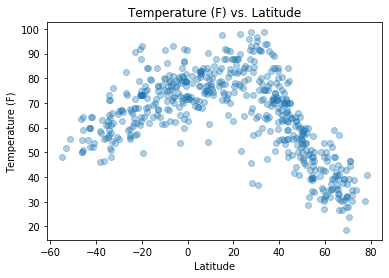

In [10]:
# Temperature (F) vs. Latitude
x_values = df['latitude']
y_values = df['max_temp']
plt.scatter(x_values,y_values, alpha=0.35)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Temperature (F) vs. Latitude')
plt.savefig('../figures/Fig1_temp_lat.png')
plt.show()


### Figure 1 explained
the above plot (Temperature (F) vs. Latitude) shows that temperature near the equator (where the latitude is 0) is generally higher. As you move further away from the equator (0), e.g., +20 or -20, then the temperature gets cooler

#### Latitude vs. Humidity Plot

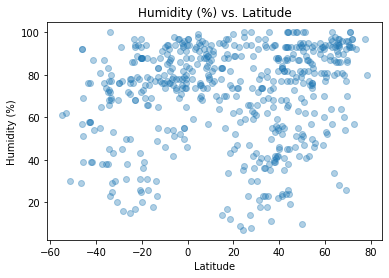

In [11]:
# Humidity (%) vs. Latitude
x_values = df['latitude']
y_values = df['humidity']
plt.scatter(x_values,y_values, alpha=0.35)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity (%) vs. Latitude')
plt.savefig('../figures/Fig2_humidity_lat.png')
plt.show()


### Figure 2 explained
the above plot (Humidity (%) vs. Latitude) shows that there's not a clear pattern / relationship between where you are (with respect to the latitutde) and the humidity (%) of the weather that you'll experience

#### Latitude vs. Cloudiness Plot

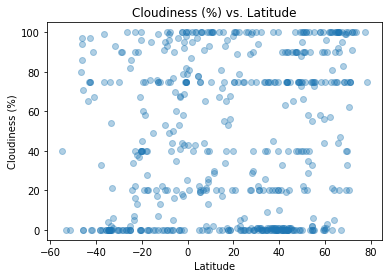

In [12]:
# Cloudiness (%) vs. Latitude
x_values = df['latitude']
y_values = df['cloudiness']
plt.scatter(x_values,y_values, alpha=0.35)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness (%) vs. Latitude')
plt.savefig('../figures/Fig3_cloudiness_lat.png')
plt.show()


### Figure 3 explained
the above plot (Cloudiness (%) vs. Latitude) shows that there's not a clear pattern or relationship between where you are (with respect to the latitutde) and the cloudiness (%) of the weather that you'll experience

#### Latitude vs. Wind Speed Plot

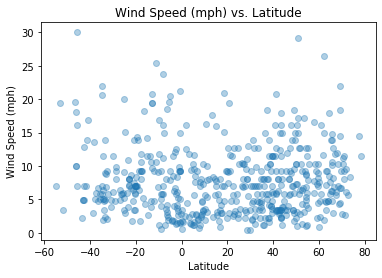

In [13]:
# Wind Speed (mph) vs. Latitude
x_values = df['latitude']
y_values = df['windspeed']
plt.scatter(x_values,y_values, alpha=0.35)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed (mph) vs. Latitude')
plt.savefig('../figures/Fig4_wind_lat.png')
plt.show()


### Figure 4 explained
the above plot (Wind Speed (mph) vs. Latitude) shows that there's not a clear pattern or relationship between where you are (with respect to the latitutde) and the windspeed (mph) of the weather that you'll experience

## Linear Regression

In [24]:
# OPTIONAL: Create a function to create Linear Regression plots
def weather_plot(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, alpha=0.35)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(np.percentile(x_values,25),np.percentile(y_values, 80)),fontsize=15,color="red")
    print(f"The correlation coefficient is: {rvalue}")

In [25]:
# Create Northern and Southern Hemisphere DataFrames
# https://chrisalbon.com/python/data_wrangling/pandas_create_column_using_conditional/
# Create a new column called df.elderly where the value is yes
# if df.age is greater than 50 and no if not
df['hemisphere'] = np.where(df['latitude']>=0, 'Northern', 'Southern')
df

df_north = df.loc[df['hemisphere'] == 'Northern']
df_south = df.loc[df['hemisphere'] == 'Southern']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient is: -0.7789937156028179


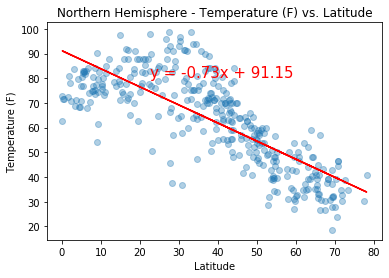

In [26]:
# Northern Hemisphere - Temperature (F) vs. Latitude
x_values = df_north['latitude']
y_values = df_north['max_temp']
weather_plot(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Northern Hemisphere - Temperature (F) vs. Latitude')
plt.savefig('../figures/Fig5_northhem_temp_lat.png')
plt.show()


### Figure 5 explained
the above plot (Northern Hemisphere - Temperature (F) vs. Latitude) suggests that in the Northern Hemisphere, there's a pretty substantial inverse correlation between the temperature (F) and the latitude. In other words, further away from the equator, i.e. the greater the latitude number, the lower the temperature typically is.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient is: 0.654807289584378


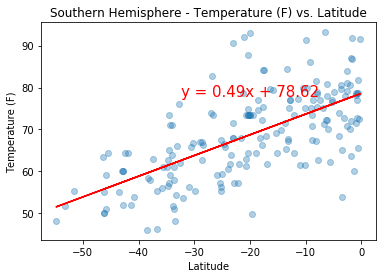

In [27]:
# Southern Hemisphere - Temperature (F) vs. Latitude
x_values = df_south['latitude']
y_values = df_south['max_temp']
weather_plot(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Southern Hemisphere - Temperature (F) vs. Latitude')
plt.savefig('../figures/Fig6_southhem_temp_lat.png')
plt.show()


### Figure 6 explained
the above plot (Southern Hemisphere - Temperature (F) vs. Latitude) suggests that in the Northern Hemisphere, there's a pretty substantial correlation between the temperature (F) and the latitude. In other words, further away from the equator, i.e. the more negative the latitude number is, the lower the temperature typically is.

The r-squared is: 0.760263355051646


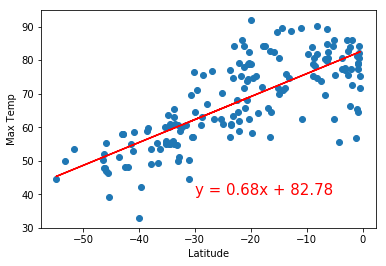

In [110]:
# BELOW IS EXAMPLE FROM GUIDE

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient is: 0.07122797028618301


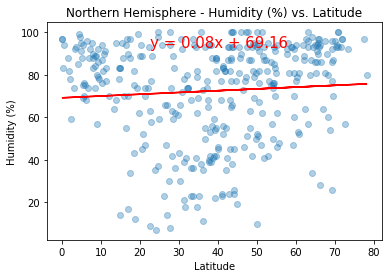

In [28]:
# Northern Hemisphere - Humidity (%) vs. Latitude
x_values = df_north['latitude']
y_values = df_north['humidity']
weather_plot(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')
plt.savefig('../figures/Fig7_northhem_humidity_lat.png')
plt.show()


### Figure 7 explained
the above plot (Northern Hemisphere - Humidity (%) vs. Latitude) suggests that in the Northern Hemisphere, there's weak to no correlation between the Humidity (%) and the latitude, i.e., the humidity (%) doesn't seem to be dependent on where you are relative to the equator.

The r-squared is: 0.10358336015746494


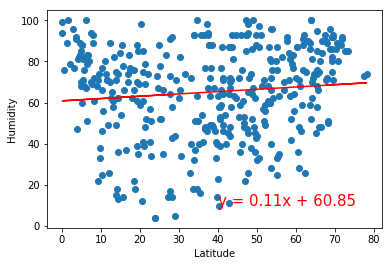

In [111]:
# BELOW IS EXAMPLE FROM GUIDE

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient is: 0.30812903942677616


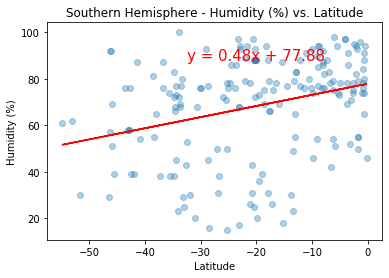

In [29]:
# Southern Hemisphere - Humidity (%) vs. Latitude
x_values = df_south['latitude']
y_values = df_south['humidity']
weather_plot(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude')
plt.savefig('../figures/Fig8_southhem_humidity_lat.png')
plt.show()


### Figure 8 explained
the above plot (Southern Hemisphere - Humidity (%) vs. Latitude) suggests that in the Southern Hemisphere, may be a weak correlation (definitely not strong correlation) between the Humidity (%) and the latitude, i.e., the humidity (%) doesn't seem to be strongly dependent on where you are relative to the equator. There may be a very mild trend that suggest the humidity tends to be higher as you move closer to the equator but this trend may not be statistically significant.

The r-squared is: 0.14689473425583055


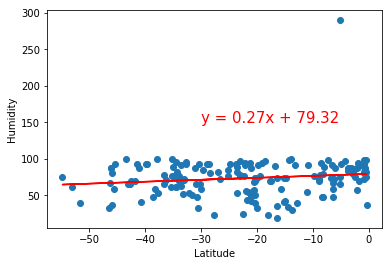

In [112]:
# BELOW IS EXAMPLE FROM GUIDE

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient is: 0.13221212920910036


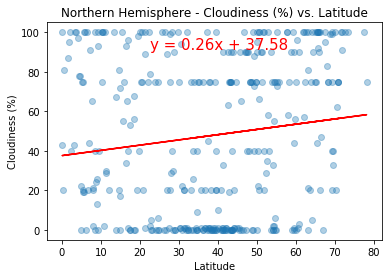

In [30]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude
x_values = df_north['latitude']
y_values = df_north['cloudiness']
weather_plot(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')
plt.savefig('../figures/Fig9_northhem_cloud_lat.png')
plt.show()


### Figure 9 explained
the above plot (Northern Hemisphere - Cloudiness (%) vs. Latitude) suggests that in the Northern Hemisphere, there's also a weak to no positive correlation between cloudiness(%) and the latitude, i.e., the cloudiness (%) doesn't seem to be dependent on where you are relative to the equator.

The r-squared is: -0.08733547918934018


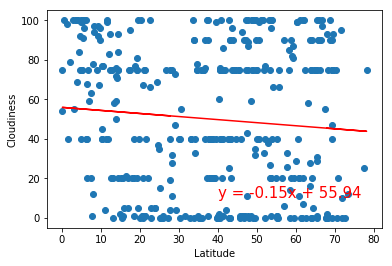

In [115]:
# BELOW IS EXAMPLE FROM GUIDE

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient is: 0.21912461081736176


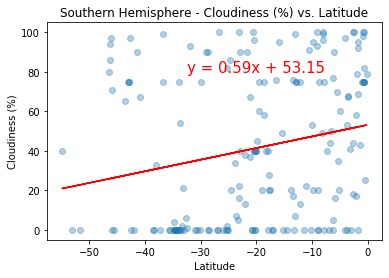

In [31]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude
x_values = df_south['latitude']
y_values = df_south['cloudiness']
weather_plot(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude')
plt.savefig('../figures/Fig10_southhem_cloud_lat.png')
plt.show()


### Figure 10 explained
the above plot (Southern Hemisphere - Cloudiness (%) vs. Latitude) suggests that in the Southern Hemisphere, there's a weak/minimal positive correlation between cloudiness(%) and the latitude, i.e., the cloudiness (%) doesn't seem to be strongly dependent on where you are relative to the equator.

The r-squared is: 0.21881426893991618


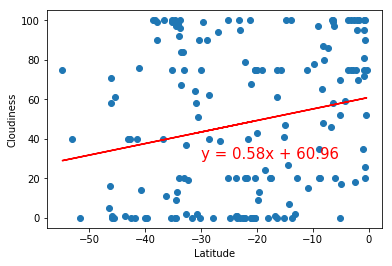

In [114]:
# BELOW IS EXAMPLE FROM GUIDE

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient is: 0.21818929117501878


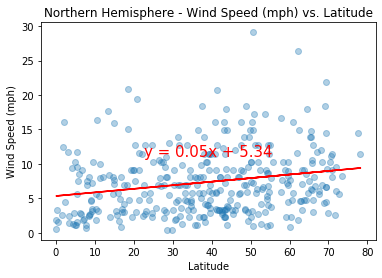

In [32]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = df_north['latitude']
y_values = df_north['windspeed']
weather_plot(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.savefig('../figures/Fig11_northhem_wind_lat.png')
plt.show()


### Figure 11 explained
the above plot (Northern Hemisphere - Wind Speed (mph) vs. Latitude) suggests that in the Northern Hemisphere, there's a weak/minimal positive correlation between wind speed (mph) and the latitude, i.e., the wind speed (mph) doesn't seem to be strongly dependent on where you are relative to the equator.

The r-squared is: 0.1071382774388479


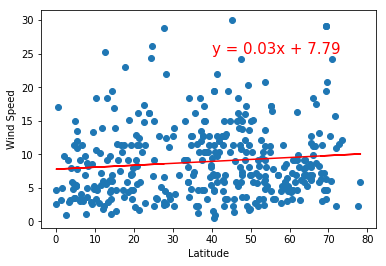

In [117]:
# BELOW IS EXAMPLE FROM GUIDE

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient is: -0.09450276296284427


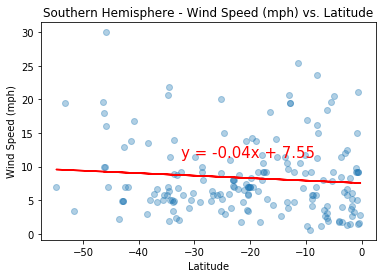

In [33]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = df_south['latitude']
y_values = df_south['windspeed']
weather_plot(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.savefig('../figures/Fig12_southhem_wind_lat.png')
plt.show()


### Figure 12 explained
the above plot (Southern Hemisphere - Wind Speed (mph) vs. Latitude) suggests that in the Southern Hemisphere, there's a weak/minimal correlation between wind speed (mph) and the latitude, i.e., the wind speed (mph) doesn't seem to be strongly dependent on where you are relative to the equator.

The r-squared is: -0.322483077139538


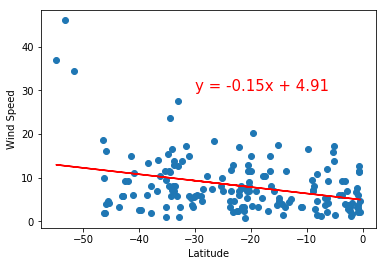

In [116]:
# BELOW IS EXAMPLE FROM GUIDE